In [46]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

In [2]:
num_classes = 10
(train_set_x, train_set_y), (test_set_X, test_set_y) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
print(train_set_x.shape, train_set_y.shape, test_set_X.shape, test_set_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


5


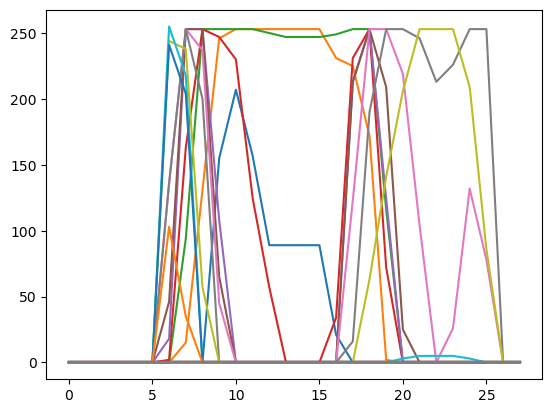

In [4]:
plt.plot(train_set_x[100])
print(train_set_y[100])

In [13]:
test_img = train_set_x[200]
print(test_img.shape)

(28, 28)


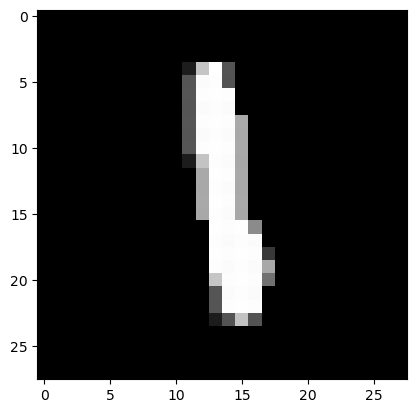

1


In [14]:
plt.imshow(test_img, cmap='gray')
plt.show()
print(train_set_y[200])

In [18]:
test_img.max()

255

In [19]:
train_set_x = train_set_x.astype('float32')/255
test_set_X = test_set_X.astype('float32')/255

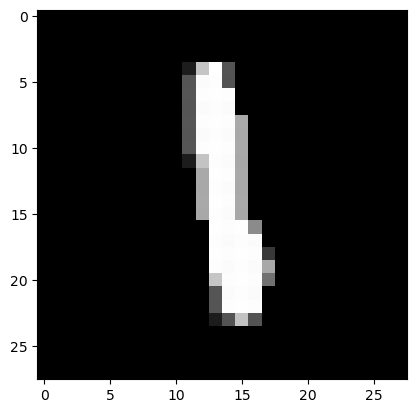

In [20]:
plt.imshow(train_set_x[200], cmap='gray')

In [21]:
train_set_x = np.expand_dims(train_set_x, -1)
test_set_X = np.expand_dims(test_set_X, -1)

In [22]:
print(train_set_x.shape, test_set_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [23]:
train_set_y[30]

3

In [24]:
train_set_y = keras.utils.to_categorical(train_set_y, num_classes)
test_set_y = keras.utils.to_categorical(test_set_y, num_classes)

In [25]:
train_set_y[30]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [26]:
input_shape = (28, 28, 1)

In [37]:
model = keras.Sequential(
    [
    keras.Input(shape = input_shape),
    layers.Conv2D(32 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)),
    layers.Conv2D(64 , kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2, 2)),
    layers.Flatten(),
    layers.Dense(500, activation = 'relu'),
    layers.Dense(num_classes, activation = 'softmax')
    ]
)

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 23, 23, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │     3,872,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,896,326 (14.86 MB)

 Trainable params: 3,896,326 (14.86 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
#model = keras.Sequential(
#    [
#    keras.Input(shape = input_shape),
#   layers.Flatten(),
#    layers.Dense(1024, activation= 'relu'),    
#    layers.Dense(500, activation= 'relu'),
#    layers.Conv2D(32 , kernel_size = (3,3), activation = 'relu'),
#    layers.MaxPool2D(pool_size = (2, 2), strides = (1, 1)),
#    layers.Conv2D(64 , kernel_size = (3,3), activation = 'relu'),
#    layers.MaxPool2D(pool_size = (2, 2)),
#    layers.Flatten(),
#    layers.Dense(500, activation = 'relu'),
#    layers.Dense(num_classes, activation = 'softmax')
#    ]
#)

In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,571,850 (6.00 MB)

 Trainable params: 1,571,850 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
batch = 512
epoch = 100

In [47]:
model.compile(optimizer = 'Adam', loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])

In [50]:
hist = model.fit(train_set_x, train_set_y, epochs=epoch, batch_size=batch, validation_split=0.1)

Epoch 1/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1076 - loss: 0.3251 - val_accuracy: 0.1050 - val_loss: 0.3252
Epoch 2/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.1118 - loss: 0.3251 - val_accuracy: 0.1050 - val_loss: 0.3252
Epoch 3/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.1092 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3253
Epoch 4/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.1088 - loss: 0.3251 - val_accuracy: 0.1050 - val_loss: 0.3253
Epoch 5/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.1084 - loss: 0.3252 - val_accuracy: 0.0952 - val_loss: 0.3253
Epoch 6/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.1076 - loss: 0.3251 - val_accuracy: 0.1050 - val_loss: 0.3253
Epoch 7/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.1114 - loss: 0.3252 - val_accuracy: 0.1050 - val_loss: 0.3253
Epoch 8/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.1107 - loss: 0.3251 - 

106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1136 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3250
Epoch 51/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1130 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3250
Epoch 52/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.1110 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3251
Epoch 53/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.1115 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3252
Epoch 54/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1109 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3251
Epoch 55/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.1083 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3251
Epoch 56/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1151 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3250
Epoch 57/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1101 - loss: 0.3250 - val_a

106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.1109 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3251
Epoch 100/100
106/106 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.1096 - loss: 0.3250 - val_accuracy: 0.1050 - val_loss: 0.3250


In [51]:
score = model.evaluate(test_set_X, test_set_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1160 - loss: 0.3249


In [52]:
predictions = model.predict(test_set_X)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [55]:
print(np.argmax(predictions[0]))

1


In [56]:
predictions.shape

(10000, 10)

In [62]:
for i in predictions:
    print(np.argmax(i), i)

1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477888 0.1039777  0.09999855 0.10168803 0.08606435
 0.09912563 0.10973843 0.09585589 0.09237212]
1 [0.09640034 0.11477888 0.1039777  0.09999855 0.10168801 0.08606437
 0.09912563 0.10973846 0.09585589 0.09237212]
1 [0.09640038 0.11477892 0.10397769 0.09999859 0.10168802 0.08606435
 0.09912562 0.10973845 0.09585588 0.09237212]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585588 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566

1 [0.09640033 0.11477885 0.1039777  0.09999858 0.10168801 0.08606439
 0.09912566 0.10973844 0.09585592 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640032 0.11477888 0.10397768 0.09999858 0.10168803 0.08606435
 0.09912565 0.10973843 0.09585591 0.0923721 ]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640039 0.11477887 0.1039777  0.09999859 0.10168802 0.08606436
 0.09912565 0.10973842 0.09585588 0.09237211]
1 [0.09640037 0.11477888 0.10397772 0.09999855 0.10168803 0.08606435
 0.09912563

1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640036 0.11477889 0.10397772 0.09999856 0.10168802 0.08606435
 0.09912565 0.10973845 0.0958559  0.09237211]
1 [0.09640035 0.11477891 0.1039777  0.0999986  0.10168798 0.08606437
 0.09912566 0.10973843 0.09585588 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640034 0.11477888 0.1039777  0.09999855 0.10168803 0.08606435
 0.09912563 0.10973843 0.09585589 0.09237212]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566

1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640034 0.11477888 0.1039777  0.09999855 0.10168803 0.08606435
 0.09912563 0.10973843 0.09585589 0.09237212]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.0964004  0.11477885 0.1039777  0.09999856 0.10168803 0.08606436
 0.09912562 0.10973847 0.09585587 0.09237213]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566 0.10973846 0.09585591 0.09237213]
1 [0.09640034 0.11477885 0.10397769 0.09999856 0.10168801 0.08606435
 0.09912566 0.10973847 0.09585592 0.0923721 ]
1 [0.09640037 0.11477891 0.1039777  0.09999857 0.10168803 0.08606434
 0.09912566

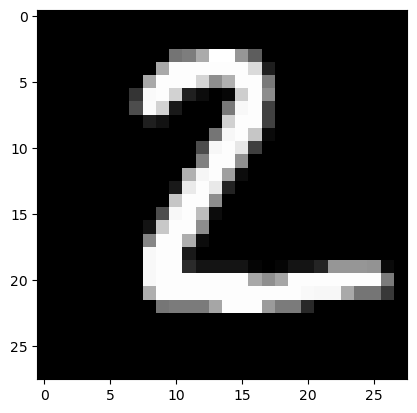

In [61]:
plt.imshow(test_set_X[1], cmap='gray')